In [41]:
import numpy as np
import cv2 as cv
from utilities import funcs
from matplotlib import pyplot as plt

In [42]:
#figure size
plt.rcParams['figure.figsize'] = [12,5]

plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 300

plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

#default colormap
plt.rc('image', cmap='plasma')

In [43]:
#useful definitions and quantities

dx = 0.065
bound_up = dx*1400

def plot_custom(img,title):
    fig= plt.figure()
    ax = fig.gca()
    ax.set_ylabel("$\mu m$")
    ax.set_xlabel("$\mu m$")
    pos = ax.imshow(img, extent = [0,bound_up,0,bound_up])
    fig.colorbar(pos, ax=ax)
    pos.set_clim(0,1)
    plt.title(title)

def plot_custom_double(img1,img2,title):
    fig, (ax1,ax2) = plt.subplots(1,2)

    fig.suptitle(title)

    pos1 = ax1.imshow(img1)
    pos1.set_clim(0,1200)
    fig.colorbar(pos1, ax=ax1)
    ax1.set_title("RFP")
    ax1.set_ylabel("$\mu m$")
    ax1.set_xlabel("$\mu m$")

    pos2 = ax2.imshow(img2)
    pos2.set_clim(0,5)
    fig.colorbar(pos2, ax=ax2)
    ax2.set_title("CY5")
    ax2.set_ylabel("$\mu m$")
    ax2.set_xlabel("$\mu m$")


# Import

In [44]:
## Img 1 Confocal
#tuple import
cv_img_1_con_RFP = cv.imreadmulti('Data/1/confocal/1RFP.TIF', flags=2)[1]
cv_img_1_con_CY5 = cv.imreadmulti('Data/1/confocal/1CY5.TIF', flags=2)[1]

# Img 1 superresoluted
#tuple import
cv_img_1_str_RFP = cv.imreadmulti('Data/1/super_resolution/1RFP.TIF', flags=2)[1]
cv_img_1_str_CY5 = cv.imreadmulti('Data/1/super_resolution/1CY5.TIF', flags=2)[1]

## Img 2 Confocal
#tuple import
cv_img_2_con_RFP = cv.imreadmulti('Data/2/confocal/2RFP.TIF', flags=2)[1]
cv_img_2_con_CY5 = cv.imreadmulti('Data/2/confocal/2CY5.TIF', flags=2)[1]

## Img 2 superresoluted
#tuple import
cv_img_2_str_RFP = cv.imreadmulti('Data/2/super_resolution/3_VCS_w1VCS_100X_RFP.TIF', flags=2)[1]
cv_img_2_str_CY5 = cv.imreadmulti('Data/2/super_resolution/3_VCS_w2VCS_100X_CY5.TIF', flags=2)[1]

In [45]:
N_layers = len(cv_img_1_str_RFP)
print("Layers number:", N_layers)
n_img = 16

Layers number: 19


# Method 1

## Image 1

## Image 2

RFP max camera value, layer  14 : 4660
CY5 max camera value, layer  14 : 55


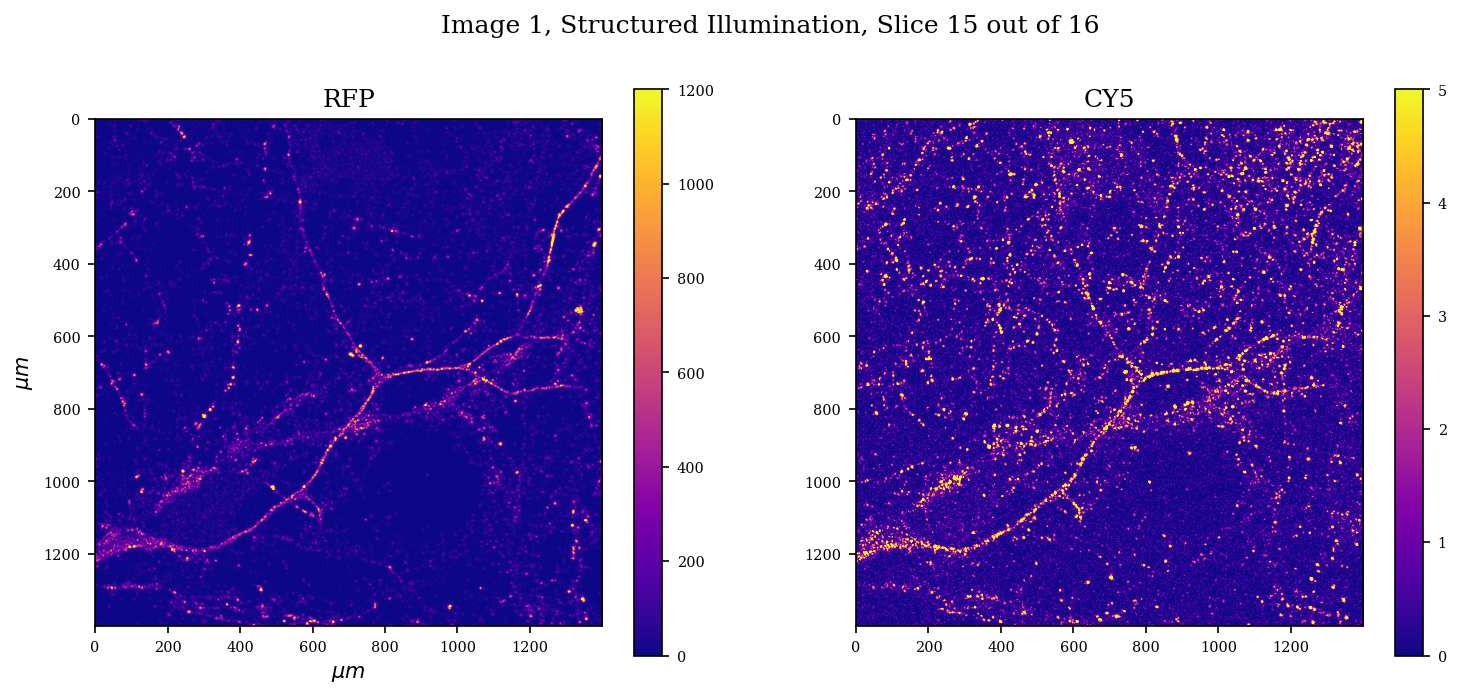

In [46]:
N_layers = len(cv_img_2_str_RFP)
n_img = 14

fig, (ax1,ax2) = plt.subplots(1,2)

#RFP
fig.suptitle("Image 1, Structured Illumination, Slice " + str(n_img+1) + " out of " + str(N_layers))

pos1 = ax1.imshow(cv_img_2_str_RFP[n_img])
pos1.set_clim(0,1200)
fig.colorbar(pos1, ax=ax1)
ax1.set_title("RFP")
ax1.set_ylabel("$\mu m$")
ax1.set_xlabel("$\mu m$")

#CY5
pos2 = ax2.imshow(cv_img_2_str_CY5[n_img])
pos2.set_clim(0,5)
fig.colorbar(pos2, ax=ax2)
ax2.set_title("CY5")
ax1.set_ylabel("$\mu m$")
ax1.set_xlabel("$\mu m$")


print("RFP max camera value, layer ", n_img, ":", np.amax(cv_img_2_str_RFP[n_img]))
print("CY5 max camera value, layer ", n_img, ":", np.amax(cv_img_2_str_CY5[n_img]))

In [47]:
img = cv_img_2_str_RFP[n_img]

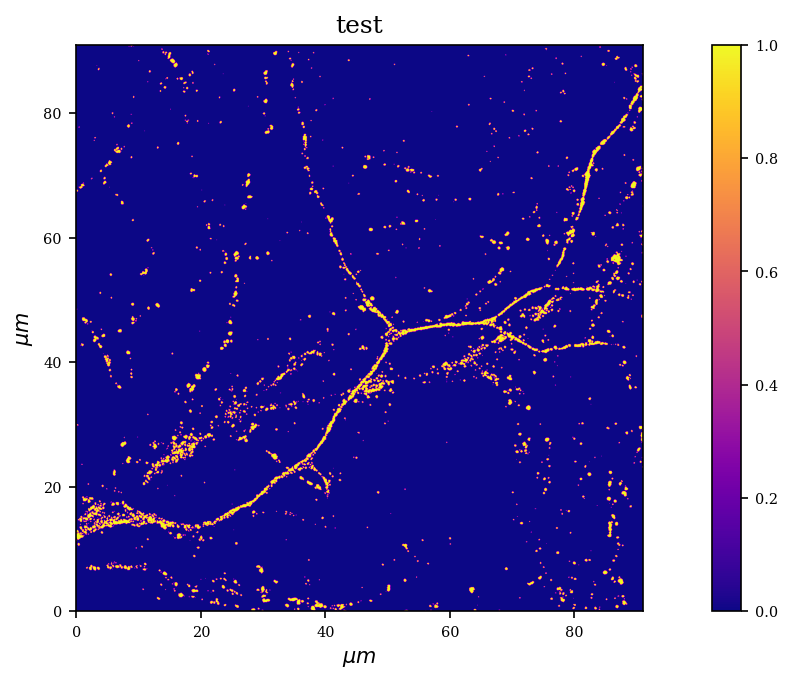

In [48]:
ret,temp_img = cv.threshold(img, 250, 1, cv.THRESH_BINARY)

plot_custom(temp_img,"test")
plt.savefig("img/test.png")

In [ ]:
#median blurring
temp_img = cv.medianBlur(temp_img,5)


#Closure
kernel_cl1 = np.ones((12,12),np.uint8)
temp_img = cv.morphologyEx(temp_img, cv.MORPH_CLOSE, kernel_cl1)


#Dilation
kernel_dil = np.ones((6,6),np.uint8)
temp_img = cv.dilate(temp_img,kernel_dil,iterations = 1)

#Connected component analysis
final_component = funcs.get_biggest_object(temp_img)


final_processed = final_component * img

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2)
    
fig.suptitle("Image 2, Structured Illumination RFP, Slice " + str(ii+1) + " out of " + str(N_layers))

pos1 = ax1.imshow(final_processed)
pos1.set_clim(0,600)
fig.colorbar(pos1, ax=ax1)
ax1.set_title("Filtered")




pos2 = ax2.imshow(cv_img_2_str_RFP[ii])
pos2.set_clim(0,600)
fig.colorbar(pos2, ax=ax2)
ax2.set_title("Unfiltered")



filtered_negative = (1-final_processed) *  cv_img_2_str_RFP[ii]

fig, (ax1,ax2) = plt.subplots(1,2)
    
fig.suptitle("Image 2, Structured Illumination RFP, Slice " + str(ii+1) + " out of " + str(N_layers))

pos1 = ax1.imshow(filtered_negative)
pos1.set_clim(0,600)
fig.colorbar(pos1, ax=ax1)
ax1.set_title("Background")

pos2 = ax2.imshow(cv_img_2_str_RFP[ii])
pos2.set_clim(0,600)
fig.colorbar(pos2, ax=ax2)
ax2.set_title("Unfiltered")

# Method 2

## Image 1

## Image 2